# TP2

## Exercice 1

<Axes: title={'center': 'Programming languages per year'}, xlabel='year'>

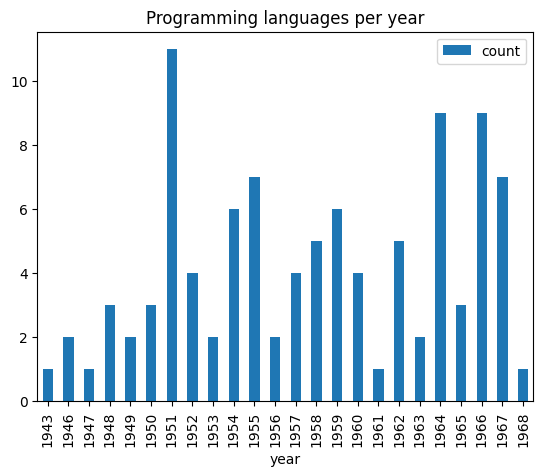

In [5]:
from pandas import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open("DataMining/data/pl.json"))
dataframe = json_normalize(data)
grouped = dataframe.groupby("year").count()
grouped = grouped.rename(columns={"languageLabel": "count"}).reset_index()
grouped.plot(x=0, kind="bar", title="Programming languages per year")

C:\Users\aubry\AppData\Local\Temp\ipykernel_1188\2674146810.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  from pandas import json_normalize
C:\Users\aubry\AppData\Local\Temp\ipykernel_1188\2674146810.py:23: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g = grouped.get_group(group).reset_index()
C:\Users\aubry\AppData\Local\Temp\ipykernel_1188\2674146810.py:23: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_g

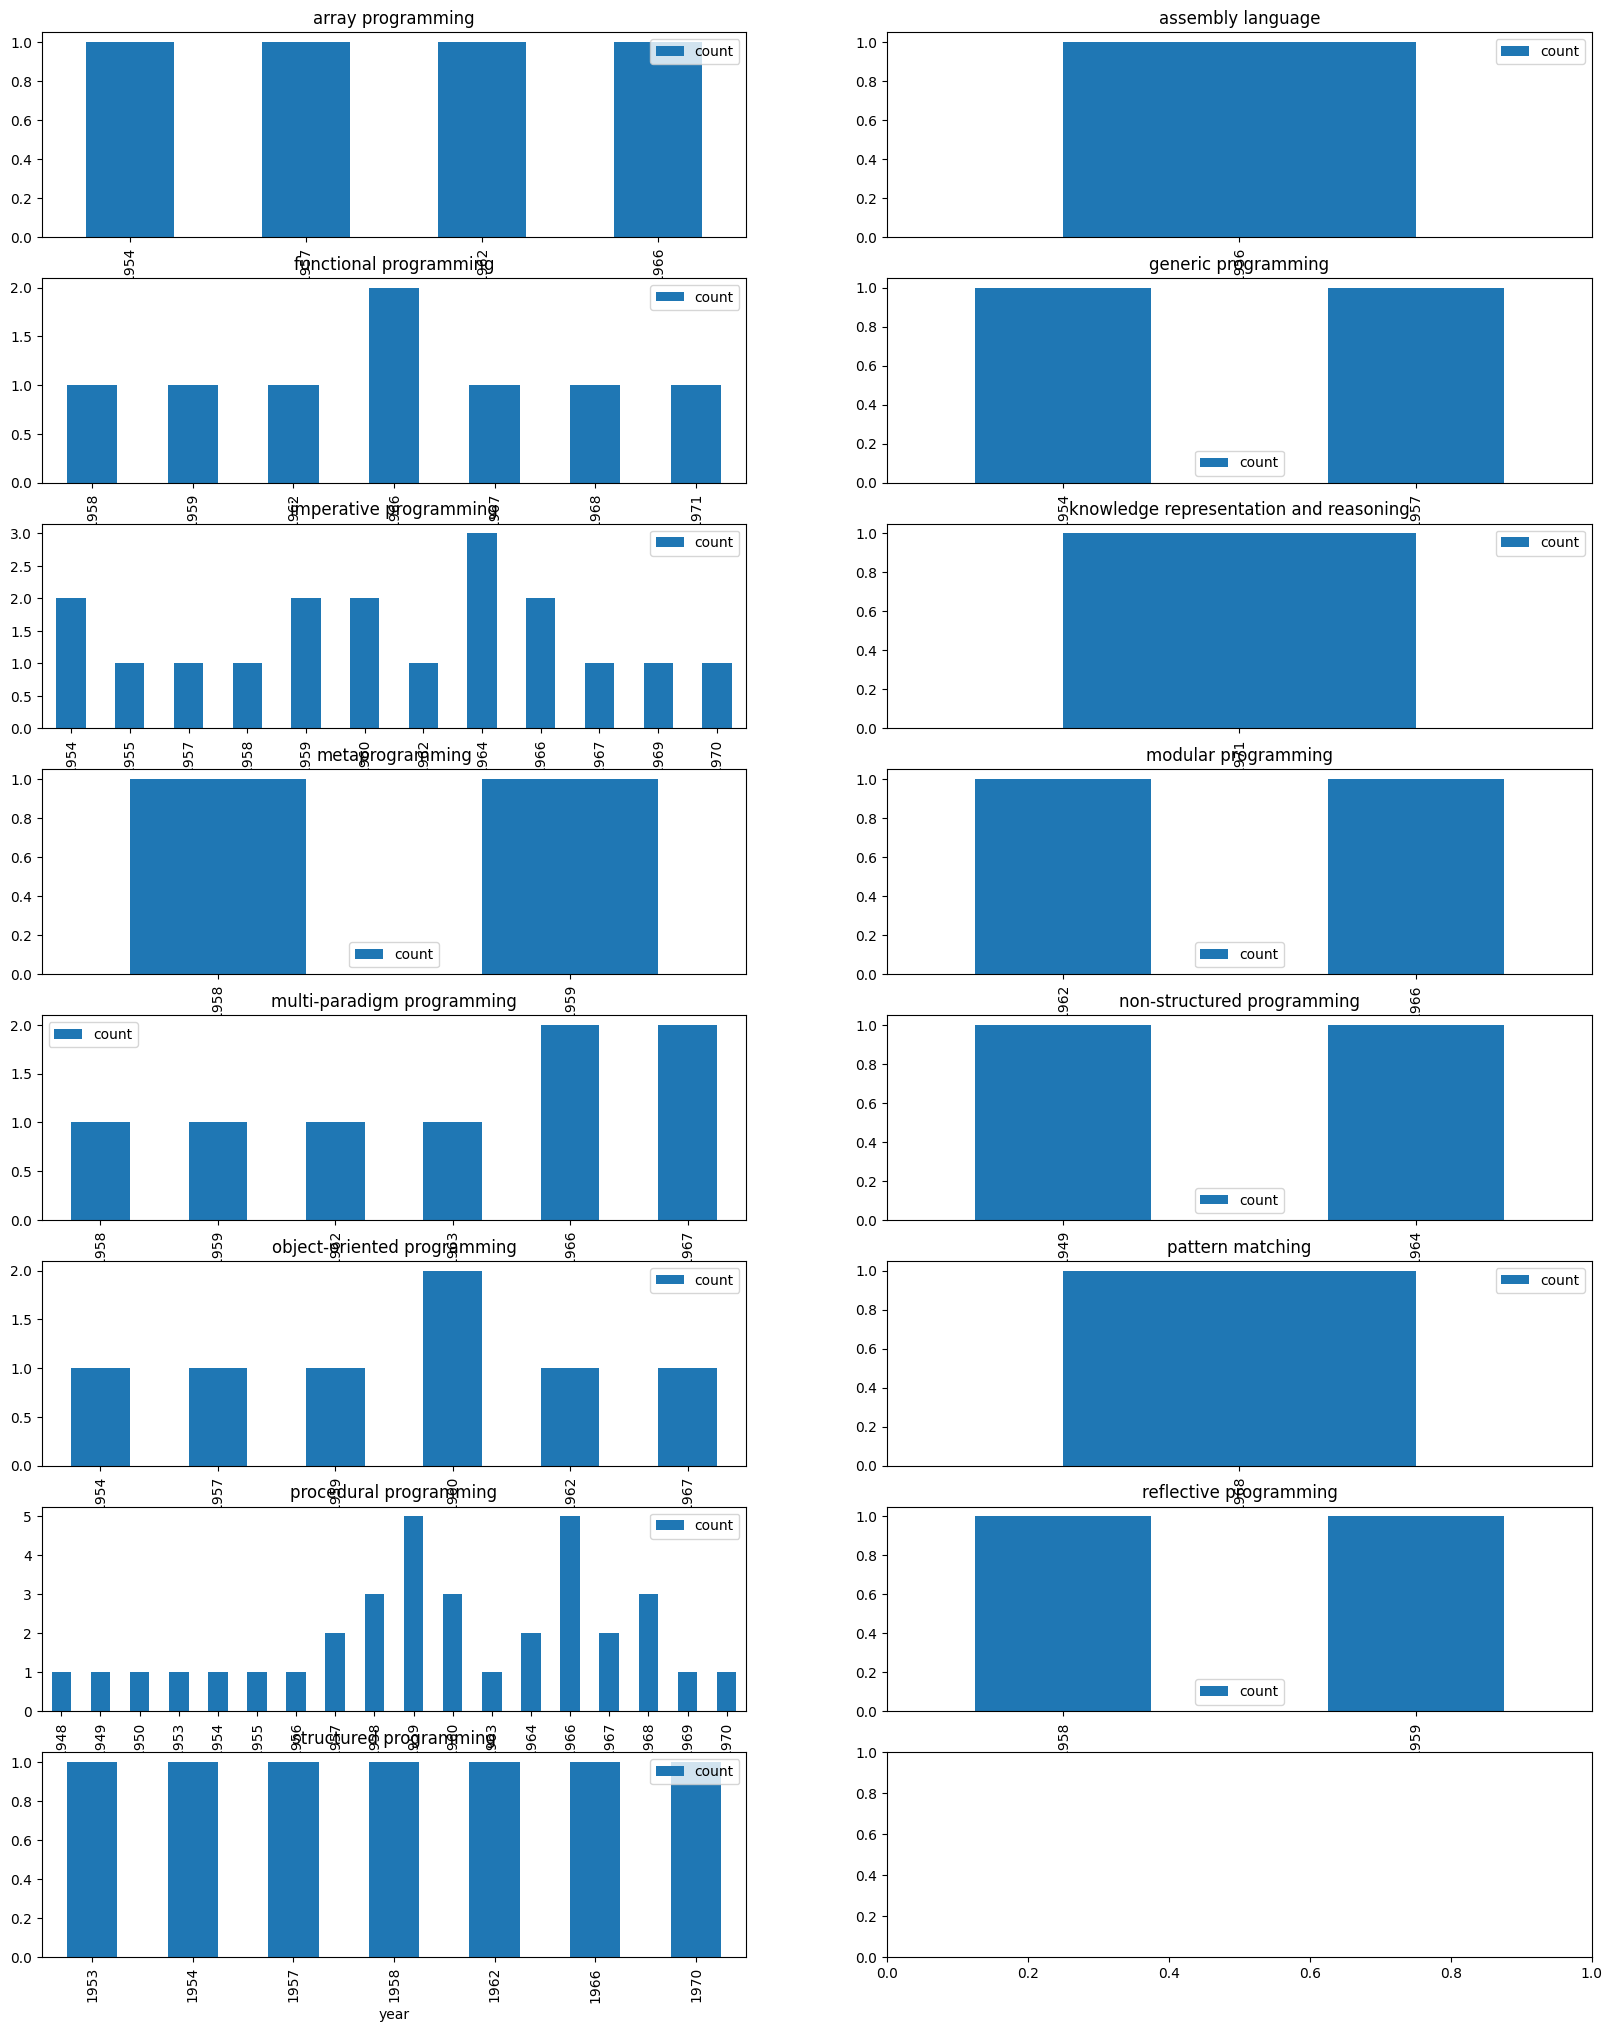

In [1]:
from pandas import json_normalize
import pandas as pd
import json
import math
import matplotlib.pyplot as plot

jsondata = json.load(open("DataMining/data/plparadigm.json"))
array = []
for data in jsondata:
    array.append([data["year"], data["languageLabel"], data["paradigmLabel"]])
dataframe = pd.DataFrame(array, columns=["year", "languageLabel", "paradigmLabel"])
dataframe = dataframe.astype(
    dtype={"year": "int64", "languageLabel": "<U200", "paradigmLabel": "<U200"}
)
grouped = dataframe.groupby(["paradigmLabel", "year"]).count()
grouped = grouped.rename(columns={"languageLabel": "count"})
grouped = grouped.groupby(["paradigmLabel"])
# Initialization of subplots
nr = math.ceil(grouped.ngroups / 2)
fig, axes = plot.subplots(nrows=nr, ncols=2, figsize=(20, 25))
# Creation of subplots
for i, group in enumerate(grouped.groups.keys()):
    g = grouped.get_group(group).reset_index()
    g.plot(
        x="year", y="count", kind="bar", title=group, ax=axes[math.floor(i / 2), i % 2]
    )
plot.show()

## Exercice 2

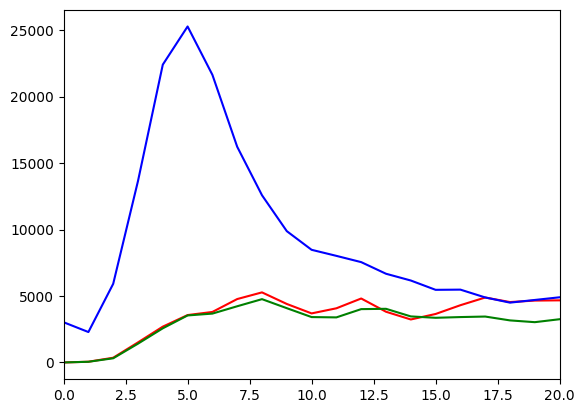

In [16]:
import os, sys
from PIL import Image
from PIL.ExifTags import TAGS

imgfile = Image.open("DataMining/images/flower.jpg")
# data = imgfile.getdata()
# for i in range(10):
#     for j in range(10):
#         print(i, j, data.getpixel((i, j)))
# print(imgfile.mode, imgfile.getbands(), imgfile.bits, imgfile.width, imgfile.height)

# exif_data = imgfile._getexif()

# if exif_data:  # s'il existe des informations EXIF
#     for tag, value in exif_data.items():
#         if tag in TAGS:
#             print(TAGS[tag], value)

histogram = imgfile.histogram()
# we have three bands (for this image)
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]
# fig, (axis1, axis2, axis3) = plot.subplots(nrows=3, ncols=1)
# axis1.plot(red, color="red")
# axis2.plot(green, color="green")
# axis3.plot(blue, color="blue")
# plot.show()
x = range(255)
y = []
for i in x:
    y.append((red[i], green[i], blue[i]))
figure, axes = plot.subplots()
axes.set_prop_cycle("color", ["red", "green", "blue"])
plot.plot(x, y)
plot.xlim(0, 20)
plot.show()

## Exercice 3

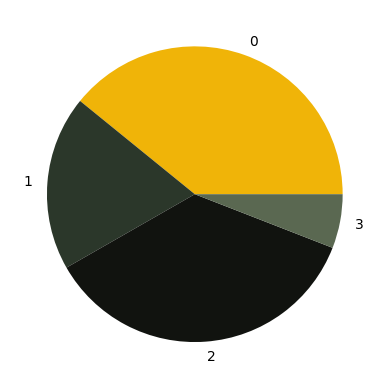

In [5]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("DataMining/images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
clusters = KMeans(n_clusters=4, n_init=2)
clusters.fit(numarray)
npbins = numpy.arange(0, 5)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)
# barlist = plot.bar(labels, histogram[0])
# for i in range(4):
#     barlist[i].set_color( 
#         "#%02x%02x%02x"
#         % (
#             math.ceil(clusters.cluster_centers_[i][0]),
#             math.ceil(clusters.cluster_centers_[i][1]),
#             math.ceil(clusters.cluster_centers_[i][2]),
#         )
#     )
colors = [
    "#%02x%02x%02x"
    % (
        math.ceil(clusters.cluster_centers_[i][0]),
        math.ceil(clusters.cluster_centers_[i][1]),
        math.ceil(clusters.cluster_centers_[i][2]),
    )
    for i in range(4)
]
pie = plot.pie(histogram[0], colors=colors, labels=labels)
plot.show()

## Exercice 4

In [3]:
from pandas import json_normalize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import json

data = json.load(open("DataMining/data/citypopulation.json"))
dataframe = json_normalize(data)
le = LabelEncoder()
dataframe["cityLabel"] = le.fit_transform(dataframe["cityLabel"])
dataframe = dataframe.astype(
    dtype={"year": "<i4", "cityLabel": "<U200", "population": "i"}
)
dataframe = dataframe.loc[dataframe["year"] > 1500]
# dataframe = dataframe.loc[dataframe['population'] < 700000]
yearPopulation = dataframe[["year", "population"]]
clusters = KMeans(n_clusters=2, n_init=1000)
clusters.fit(yearPopulation.values)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])

plot.rcParams["figure.figsize"] = [10, 10]
plot.scatter(
    yearPopulation["year"], yearPopulation["population"], c=colors[clusters.labels_]
)
plot.show()

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 3391: character maps to <undefined>

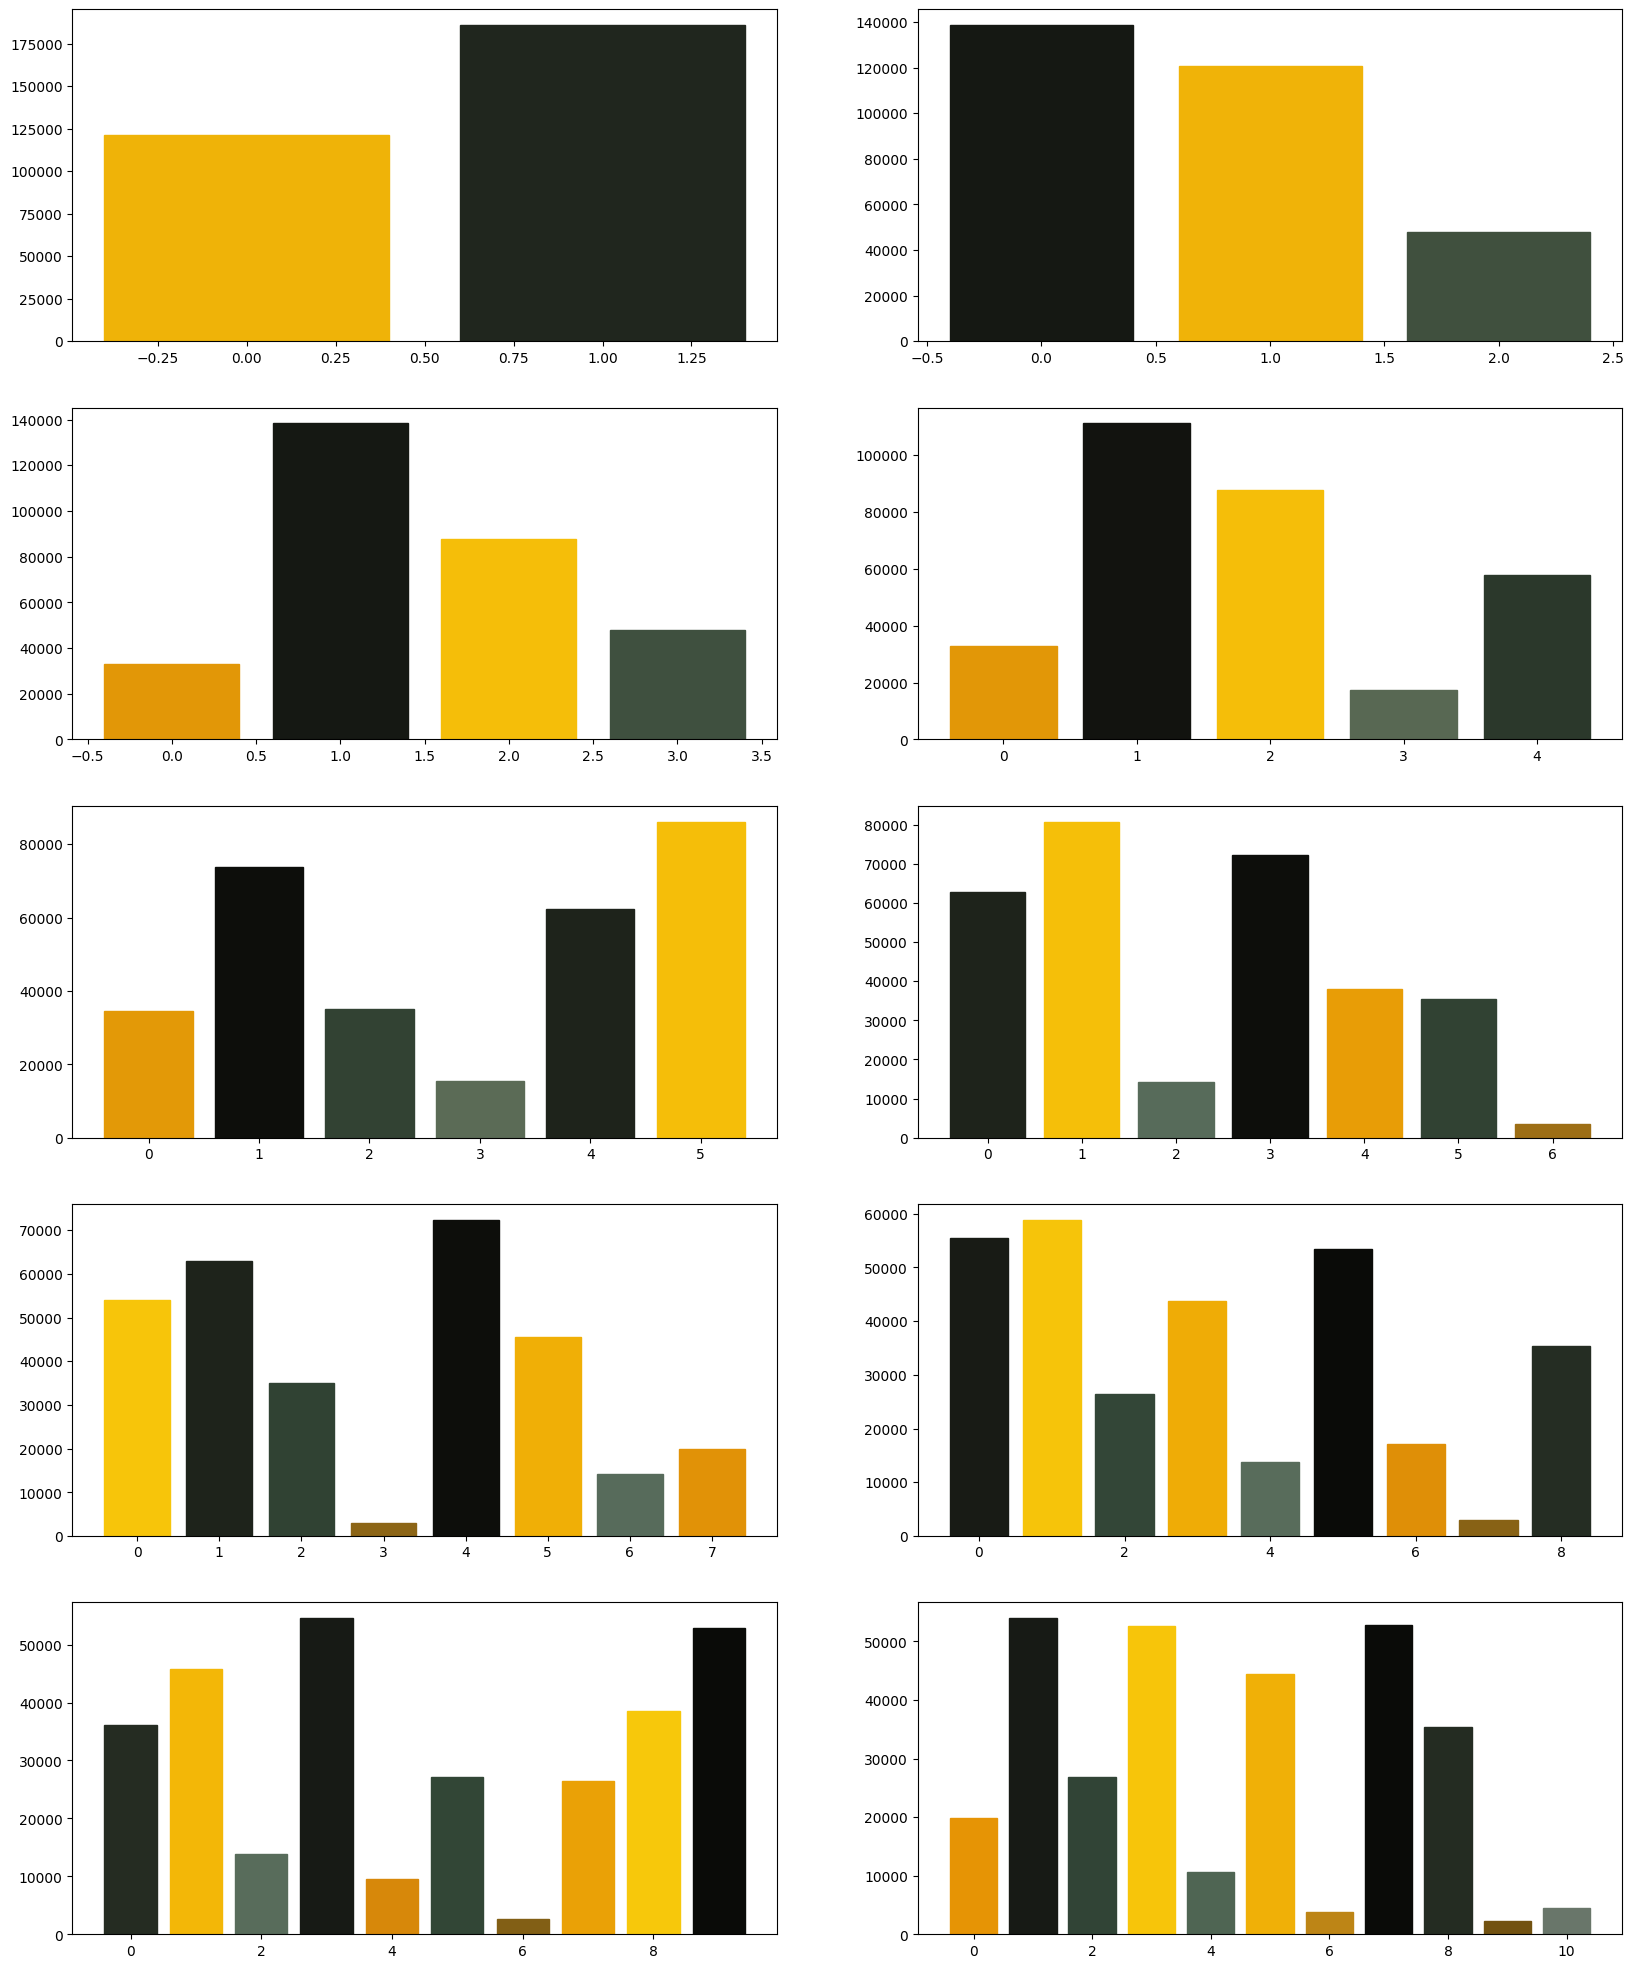

In [6]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("DataMining/images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
fig, axes = plot.subplots(nrows=5, ncols=2, figsize=(20, 25))
xaxis = 0
yaxis = 0
for x in range(2, 12):
    cluster_count = x

    clusters = KMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)

    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    labels = numpy.unique(clusters.labels_)
    barlist = axes[xaxis, yaxis].bar(labels, histogram[0])
    if yaxis == 0:
        yaxis = 1
    else:
        xaxis = xaxis + 1
        yaxis = 0
    for i in range(cluster_count):
        barlist[i].set_color(
            "#%02x%02x%02x"
            % (
                math.ceil(clusters.cluster_centers_[i][0]),
                math.ceil(clusters.cluster_centers_[i][1]),
                math.ceil(clusters.cluster_centers_[i][2]),
            )
        )
plot.show()

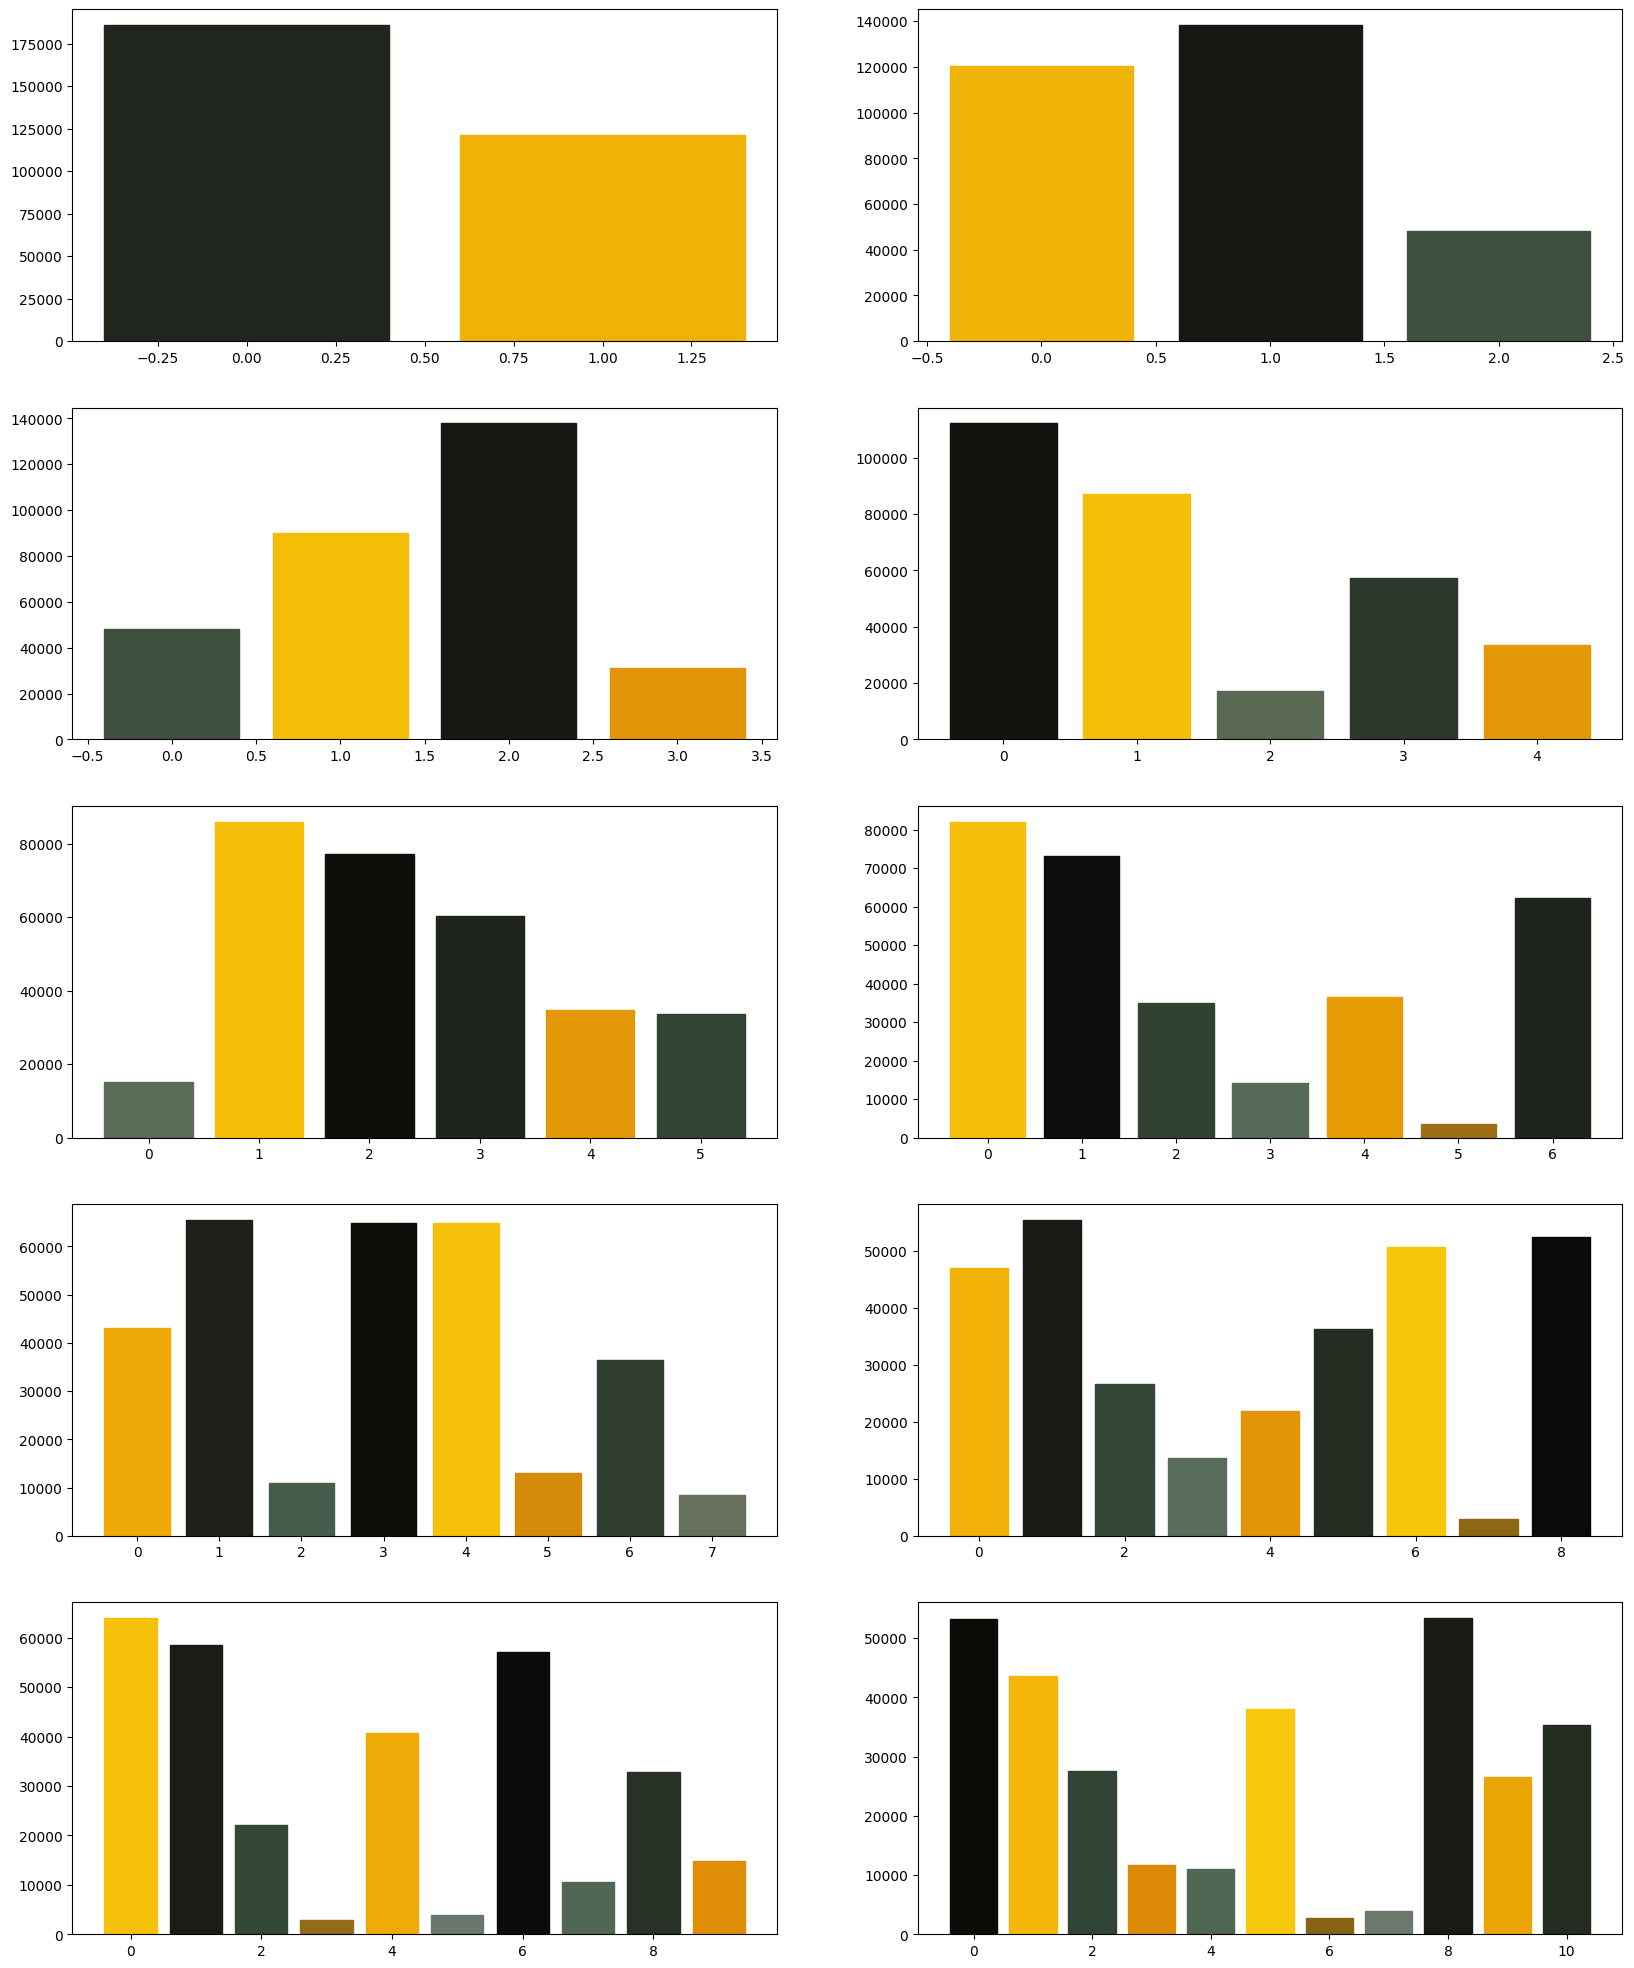

In [7]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("DataMining/images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
fig, axes = plot.subplots(nrows=5, ncols=2, figsize=(20, 25))
xaxis = 0
yaxis = 0
for x in range(2, 12):
    cluster_count = x

    clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)

    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    labels = numpy.unique(clusters.labels_)
    barlist = axes[xaxis, yaxis].bar(labels, histogram[0])
    if yaxis == 0:
        yaxis = 1
    else:
        xaxis = xaxis + 1
        yaxis = 0
    for i in range(cluster_count):
        barlist[i].set_color(
            "#%02x%02x%02x"
            % (
                math.ceil(clusters.cluster_centers_[i][0]),
                math.ceil(clusters.cluster_centers_[i][1]),
                math.ceil(clusters.cluster_centers_[i][2]),
            )
        )
plot.show()

Total time:  1 : 0.0793008804321289
Total time:  2 : 0.11134099960327148
Total time:  3 : 0.17754793167114258
Total time:  4 : 0.19365882873535156
Total time:  5 : 0.2741737365722656
Total time:  6 : 0.29802799224853516
Total time:  7 : 0.3065192699432373
Total time:  8 : 0.42104506492614746
Total time:  9 : 0.481292724609375
Total time:  10 : 0.7777986526489258
Total time:  11 : 0.7070636749267578
Total time:  12 : 0.5877909660339355
Total time:  13 : 0.8225679397583008
Total time:  14 : 0.7793090343475342
Total time:  15 : 0.926856279373169
Total time:  16 : 0.9673962593078613
Total time:  17 : 0.870863676071167
Total time:  18 : 1.4497265815734863
Total time:  19 : 0.914057731628418


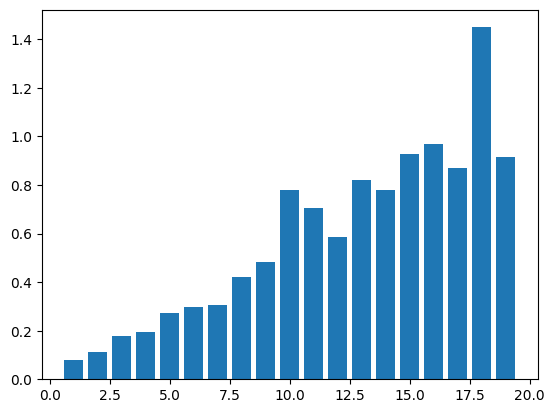

In [8]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("DataMining/images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
for x in range(1, 20):
    cluster_count = x

    start_time = time.time()
    clusters = KMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time: ", x, ":", total_time)
    X.append(x)
    Y.append(total_time)
plot.bar(X, Y)
plot.show()

Total time:  1 : 0.04369831085205078
Total time:  2 : 0.7734847068786621
Total time:  3 : 0.06587076187133789
Total time:  4 : 0.05902528762817383
Total time:  5 : 1.3067035675048828
Total time:  6 : 0.8489124774932861
Total time:  7 : 0.0627284049987793
Total time:  8 : 0.5034403800964355
Total time:  9 : 0.8604221343994141
Total time:  10 : 0.06888413429260254
Total time:  11 : 0.22788190841674805
Total time:  12 : 0.4465947151184082
Total time:  13 : 0.10897493362426758
Total time:  14 : 0.05623054504394531
Total time:  15 : 0.39204859733581543
Total time:  16 : 0.05360221862792969
Total time:  17 : 0.7722711563110352
Total time:  18 : 0.22839784622192383
Total time:  19 : 0.7497823238372803


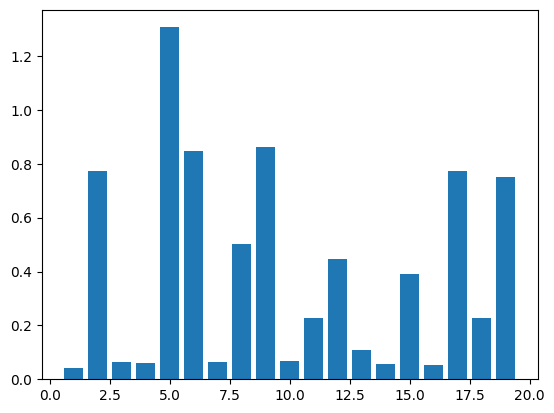

In [9]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("DataMining/images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
for x in range(1, 20):
    cluster_count = x

    start_time = time.time()
    clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time: ", x, ":", total_time)
    X.append(x)
    Y.append(total_time)
plot.bar(X, Y)
plot.show()

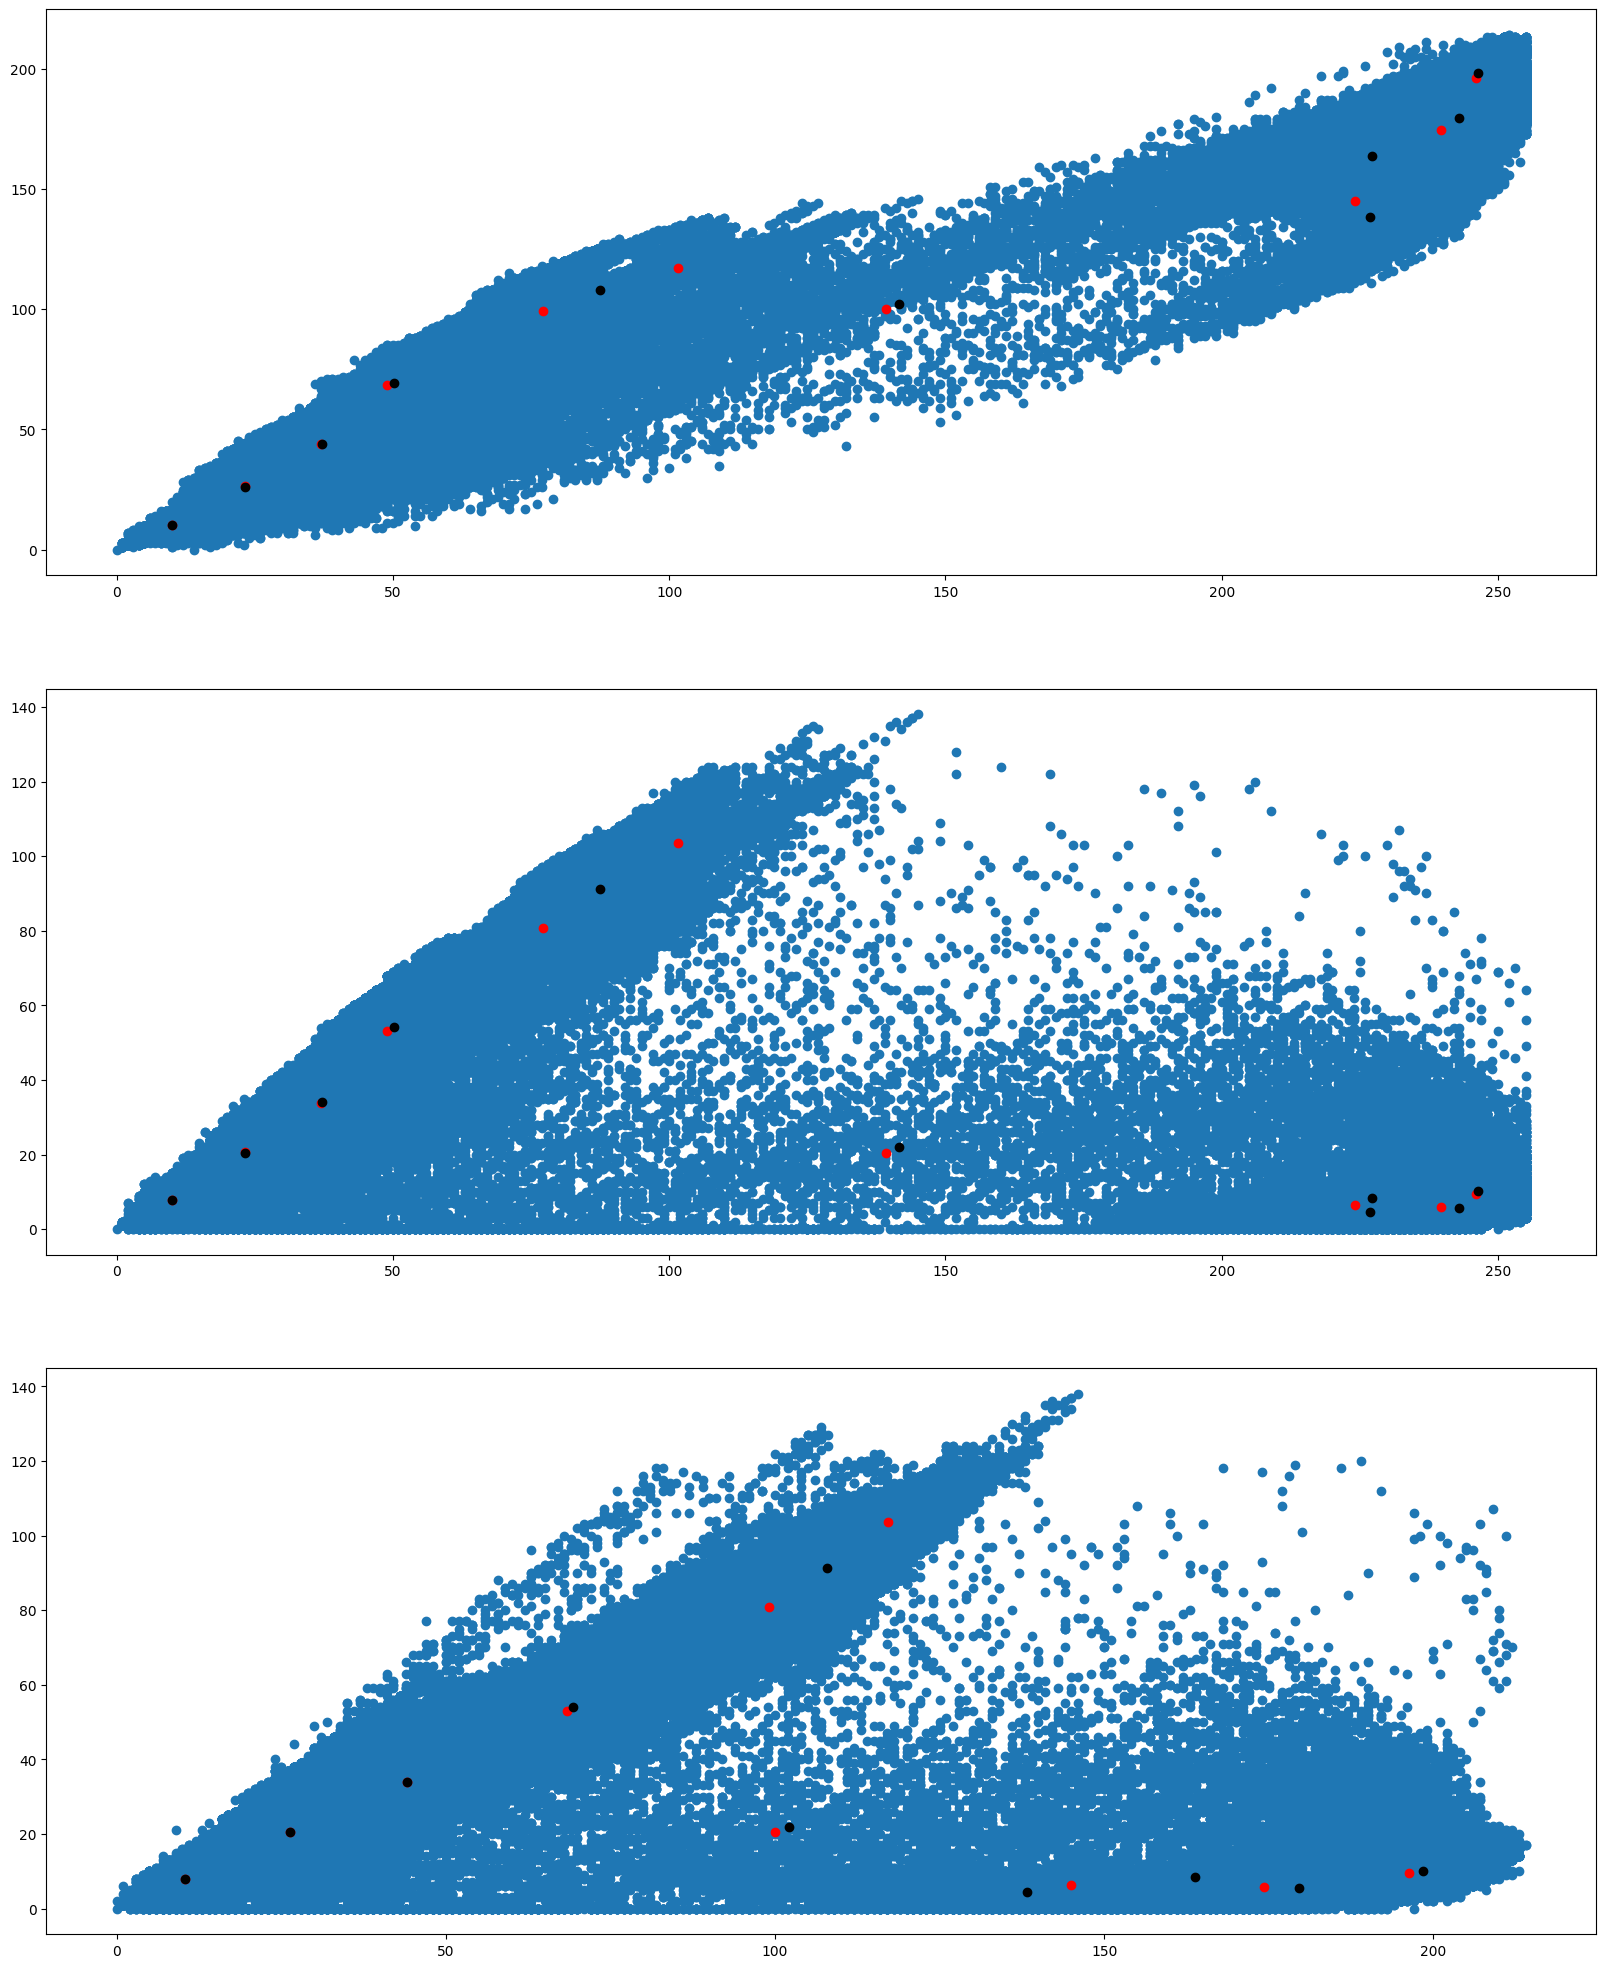

In [10]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("DataMining/images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

cluster_count = 10

clusters = KMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)

mclusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
mclusters.fit(numarray)

fig, axes = plot.subplots(nrows=3, ncols=1, figsize=(20, 25))
# Scatter plot for RG (RGB)
axes[0].scatter(numarray[:, 0], numarray[:, 1])
axes[0].scatter(
    clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], c="red"
)
axes[0].scatter(
    mclusters.cluster_centers_[:, 0], mclusters.cluster_centers_[:, 1], c="black"
)

# Scatter plot of RB (RGB)
axes[1].scatter(numarray[:, 0], numarray[:, 2])
axes[1].scatter(
    clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 2], c="red"
)
axes[1].scatter(
    mclusters.cluster_centers_[:, 0], mclusters.cluster_centers_[:, 2], c="black"
)

# Scatter plot of GB (RGB)
axes[2].scatter(numarray[:, 1], numarray[:, 2])
axes[2].scatter(
    clusters.cluster_centers_[:, 1], clusters.cluster_centers_[:, 2], c="red"
)
axes[2].scatter(
    mclusters.cluster_centers_[:, 1], mclusters.cluster_centers_[:, 2], c="black"
)

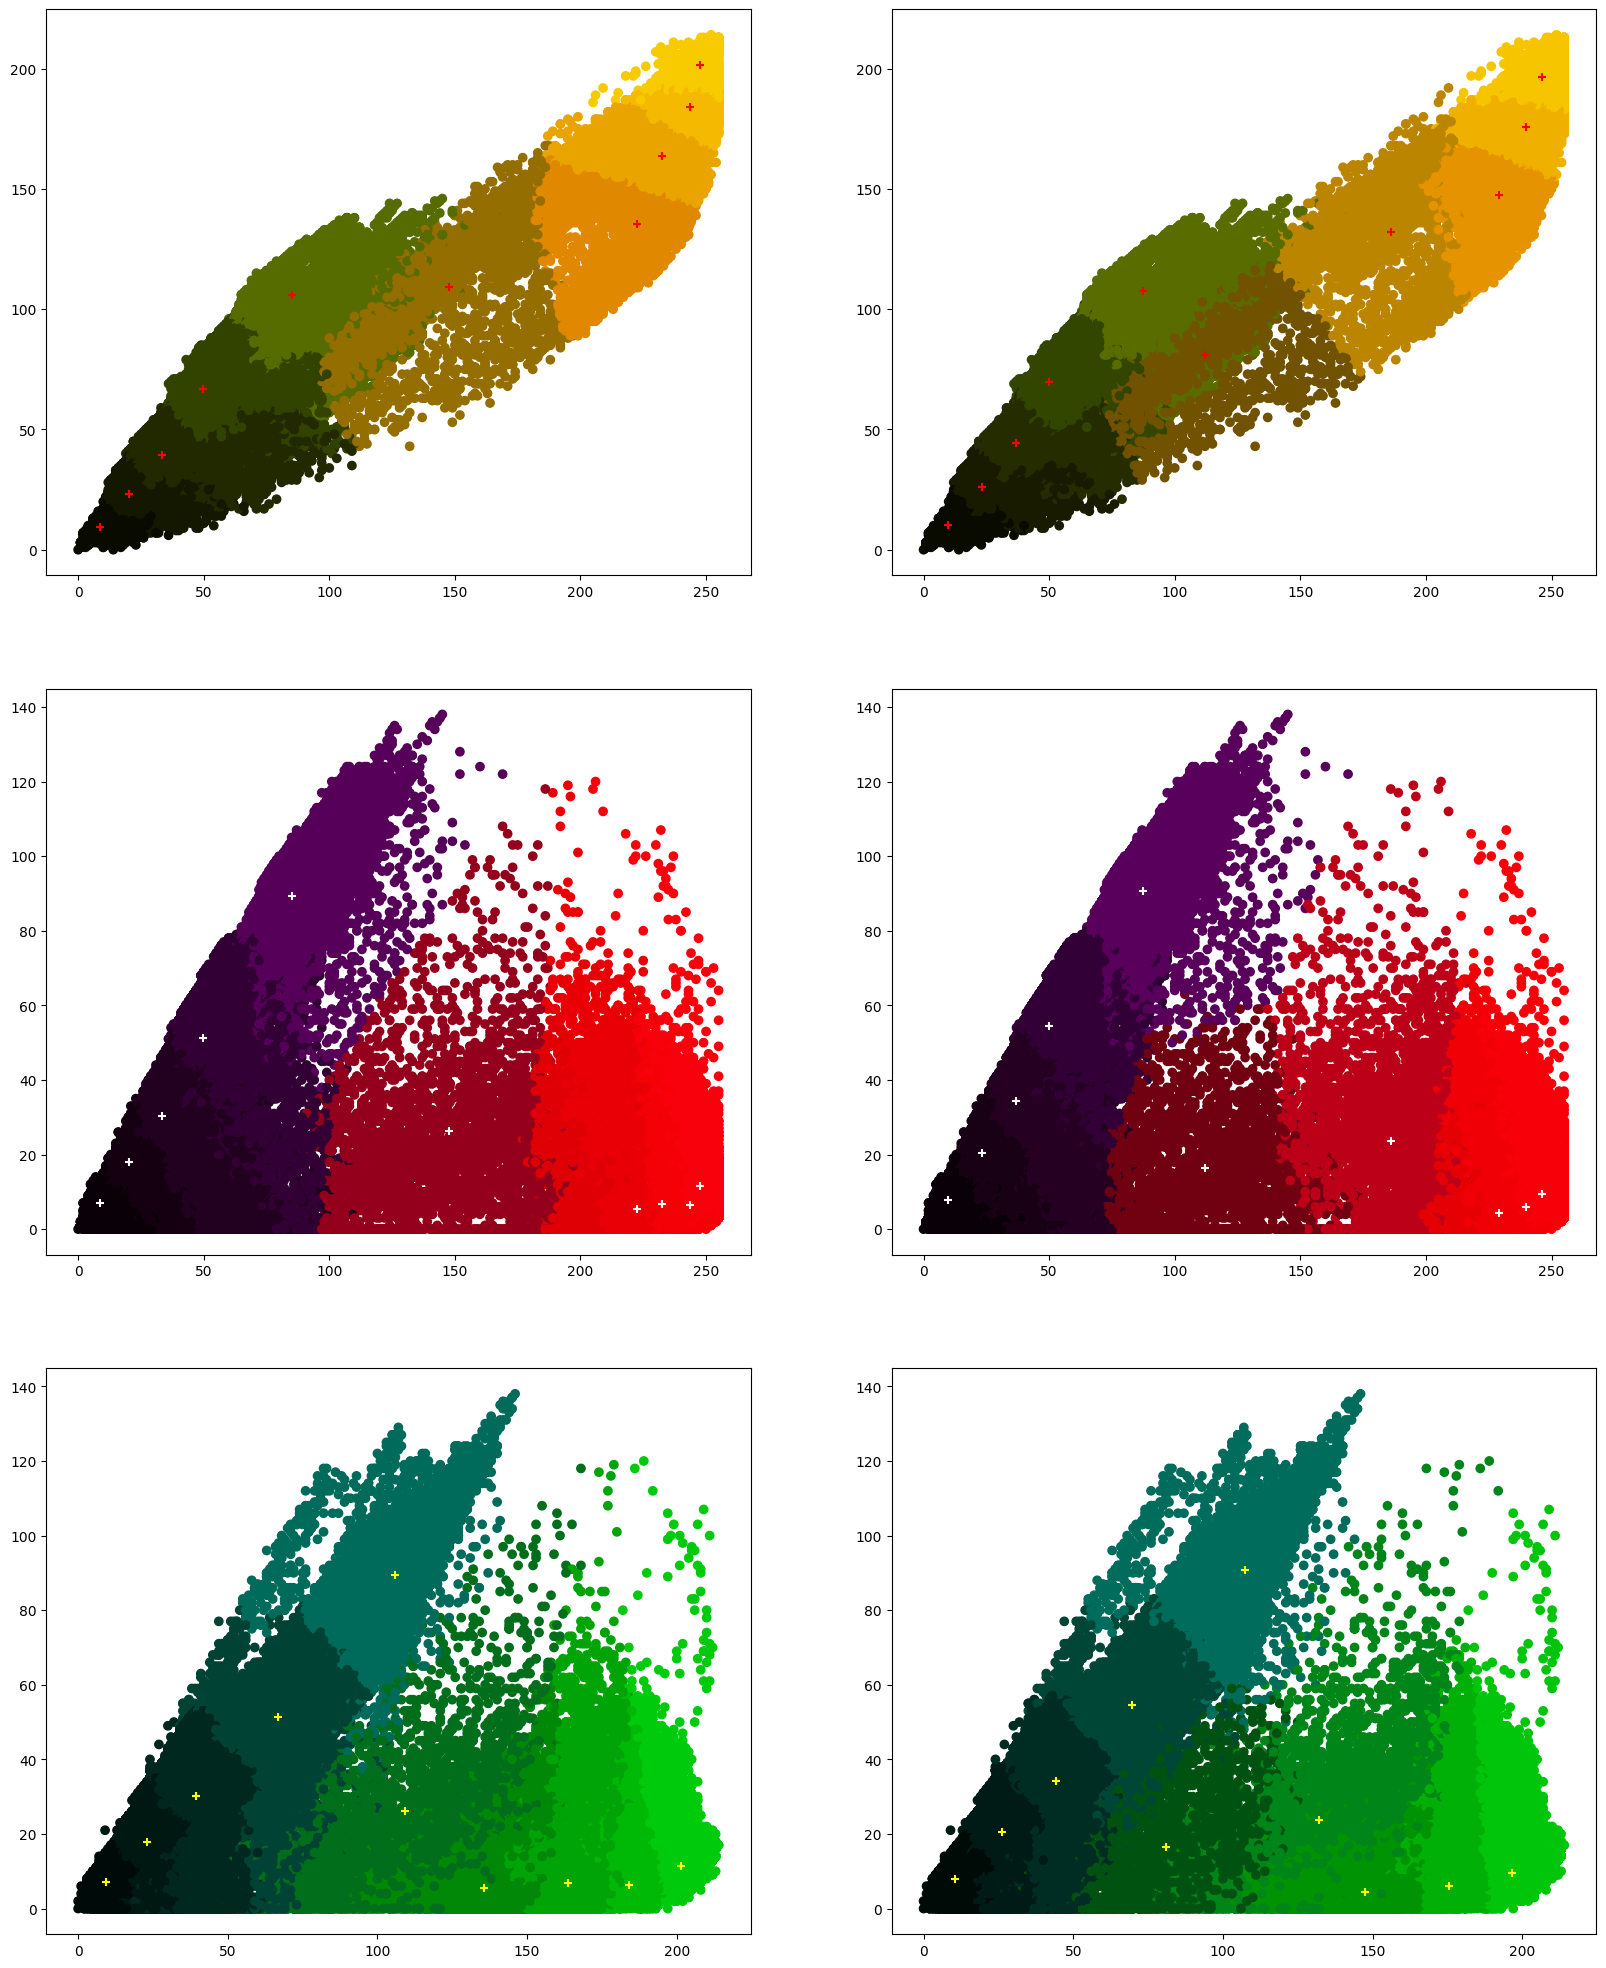

In [11]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("DataMining/images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

cluster_count = 10

mclusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
mclusters.fit(numarray)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(mclusters.labels_, bins=npbins)
labels = numpy.unique(mclusters.labels_)

fig, axes = plot.subplots(nrows=3, ncols=2, figsize=(20, 25))

# Scatter plot for RG (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(mclusters.cluster_centers_[j][0]),
            math.ceil(mclusters.cluster_centers_[j][1]),
            0,
        )
    )

axes[0, 0].scatter(numarray[:, 0], numarray[:, 1], c=colors)
axes[0, 0].scatter(
    mclusters.cluster_centers_[:, 0],
    mclusters.cluster_centers_[:, 1],
    marker="+",
    c="red",
)

# Scatter plot for RB (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(mclusters.cluster_centers_[j][0]),
            0,
            math.ceil(mclusters.cluster_centers_[j][2]),
        )
    )

axes[1, 0].scatter(numarray[:, 0], numarray[:, 2], c=colors)
axes[1, 0].scatter(
    mclusters.cluster_centers_[:, 0],
    mclusters.cluster_centers_[:, 2],
    marker="+",
    c="white",
)

# Scatter plot for GB (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            0,
            math.ceil(mclusters.cluster_centers_[j][1]),
            math.ceil(mclusters.cluster_centers_[j][2]),
        )
    )

axes[2, 0].scatter(numarray[:, 1], numarray[:, 2], c=colors)
axes[2, 0].scatter(
    mclusters.cluster_centers_[:, 1],
    mclusters.cluster_centers_[:, 2],
    marker="+",
    c="yellow",
)

clusters = KMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)

# Scatter plot for RG (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[j][0]),
            math.ceil(clusters.cluster_centers_[j][1]),
            0,
        )
    )

axes[0, 1].scatter(numarray[:, 0], numarray[:, 1], c=colors)
axes[0, 1].scatter(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 1],
    marker="+",
    c="red",
)

# Scatter plot for RB (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[j][0]),
            0,
            math.ceil(clusters.cluster_centers_[j][2]),
        )
    )

axes[1, 1].scatter(numarray[:, 0], numarray[:, 2], c=colors)
axes[1, 1].scatter(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 2],
    marker="+",
    c="white",
)

# Scatter plot for GB (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            0,
            math.ceil(clusters.cluster_centers_[j][1]),
            math.ceil(clusters.cluster_centers_[j][2]),
        )
    )

axes[2, 1].scatter(numarray[:, 1], numarray[:, 2], c=colors)
axes[2, 1].scatter(
    clusters.cluster_centers_[:, 1],
    clusters.cluster_centers_[:, 2],
    marker="+",
    c="yellow",
)
plot.show()

## Exercice 5

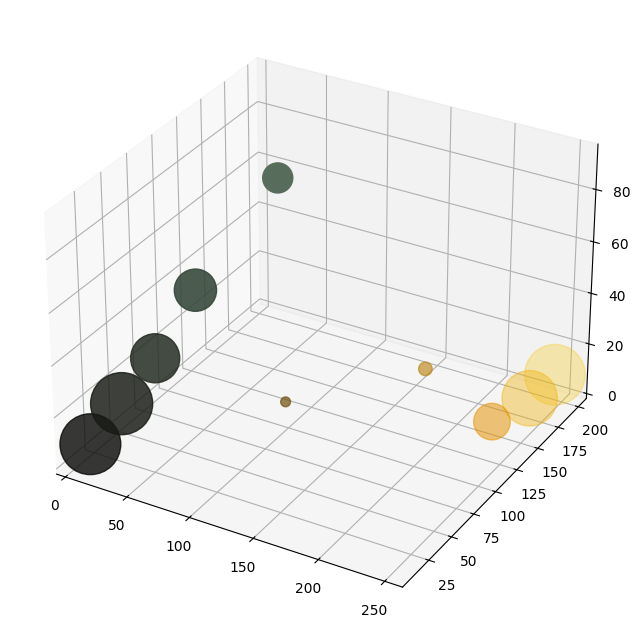

In [12]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import scale, minmax_scale

cluster_count = 10

imgfile = Image.open("DataMining/images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

# Calculer les clusters
clusters = KMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)


# Calculer le nombre de pixels appartenant à chaque cluster
unique, frequency = numpy.unique(clusters.labels_, return_counts=True)

# Mise à l'échelle de la valeur de la fréquence entre 50 et 2000
# (ces valeurs ont été choisies au hasard)
scaled_frequency = minmax_scale(frequency, feature_range=(50, 2000))

colors = []
for i in range(len(clusters.cluster_centers_)):
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
    )

# Diagramme de dispersion 3D
plot.figure(figsize=(8, 8))
axes = plot.axes(projection="3d")
axes.scatter3D(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 1],
    clusters.cluster_centers_[:, 2],
    c=colors,
    s=scaled_frequency,
);

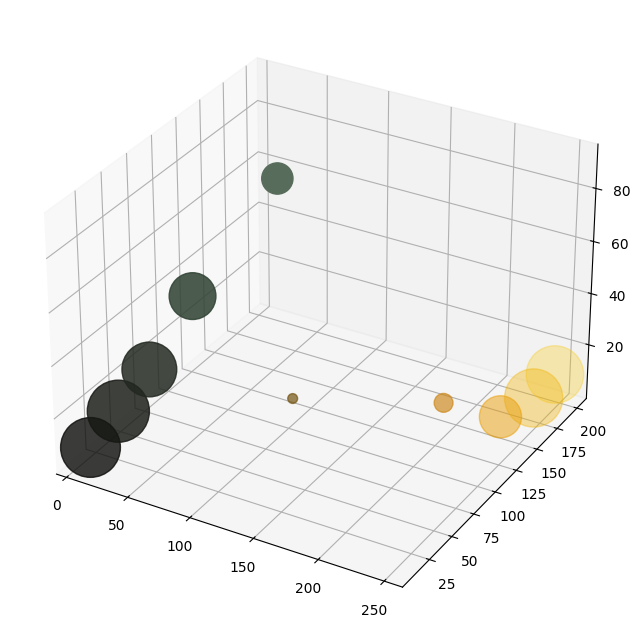

In [13]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import scale, minmax_scale

cluster_count = 10

imgfile = Image.open("DataMining/images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

# Calculer les clusters
clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)


# Calculer le nombre de pixels appartenant à chaque cluster
unique, frequency = numpy.unique(clusters.labels_, return_counts=True)

# Mise à l'échelle de la valeur de la fréquence entre 50 et 2000
# (ces valeurs ont été choisies au hasard)
scaled_frequency = minmax_scale(frequency, feature_range=(50, 2000))

colors = []
for i in range(len(clusters.cluster_centers_)):
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
    )

# Diagramme de dispersion 3D
plot.figure(figsize=(8, 8))
axes = plot.axes(projection="3d")
axes.scatter3D(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 1],
    clusters.cluster_centers_[:, 2],
    c=colors,
    s=scaled_frequency,
)